In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 20
x = np.linspace(0,10,nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [2]:
#加常数项
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [3]:
#参数真值
beta = np.array([2,5])
beta

array([2, 5])

In [4]:
#误差项
eps = np.random.normal(size = nsample)
y = np.dot(X,beta) + eps
y

array([ 1.48991495,  3.74155848,  7.38238639, 10.05468941, 13.14597711,
       15.0554434 , 17.25552605, 20.48285768, 21.80641195, 25.88542362,
       30.42416741, 31.01452426, 33.26188648, 36.81880519, 38.05434498,
       41.82091078, 45.55242753, 45.173256  , 49.20334834, 51.14257848])

In [5]:
#选择模型 最小二乘法
model = sm.OLS(y,X)

In [6]:
#拟合数据
res = model.fit()

In [7]:
#查看结果系数
res.params

array([1.93832023, 5.00000034])

In [8]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5815.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           4.71e-24
Time:                        15:35:57   Log-Likelihood:                -24.993
No. Observations:                  20   AIC:                             53.99
Df Residuals:                      18   BIC:                             55.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9383      0.384      5.054      0.000       1.133       2.744
x1             5.0000      0.066     76.255      0.000       4.862       5.138
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.606
Skew:                           0.636   Prob(JB):                        0.448
Kurtosis:                       3.554   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#预测值
y_ = res.fittedvalues
y_

array([ 1.93832023,  4.56989935,  7.20147848,  9.83305761, 12.46463673,
       15.09621586, 17.72779498, 20.35937411, 22.99095324, 25.62253236,
       28.25411149, 30.88569061, 33.51726974, 36.14884887, 38.78042799,
       41.41200712, 44.04358625, 46.67516537, 49.3067445 , 51.93832362])

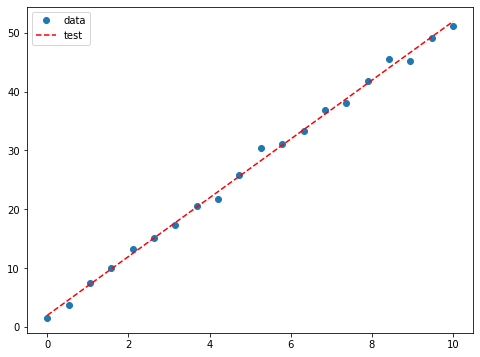

In [12]:
#画图
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label= 'data')
ax.plot(x,y_,'r--',label= 'test')
ax.legend(loc='best')
plt.show()

In [26]:
#高阶情形
n = 50
x = np.linspace(0,10,n)
X = np.column_stack((x,x**2))
X = sm.add_constant(X)

In [32]:
beta = np.array([5,2,3])
eps = np.random.normal(n)
y = np.dot(X,beta) + eps
model = sm.OLS(x,x**2)
res = model.fit()
res.params

array([0.12375421])

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              735.4
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    3.64e-31
Time:                        00:10:23   Log-Likelihood:                         -89.537
No. Observations:                  50   AIC:                                      181.1
Df Residuals:                      49   BIC:                                      183.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1238      0.005     27.118      0.000       0.115       0.133
==============================================================================
Omnibus:                        9.832   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.991
Skew:                          -1.087   Prob(JB):                      0.00677
Kurtosis:                       3.258   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

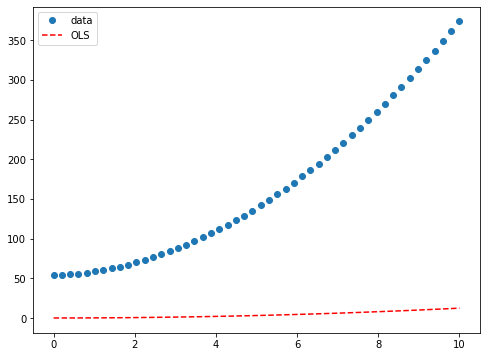

In [29]:
y_f = res.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label = 'data')
ax.plot(x,y_f,'r--',label = 'OLS')
ax.legend(loc='best')
plt.show()

In [34]:
#分类变量
n = 50
groups = np.zeros(n,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [35]:
groups[20:40]=1
groups[40:]=2
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [36]:
dummy=sm.categorical(groups,drop=True)
dummy

E:\Anaconda\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [41]:
x=np.linspace(0,20,n)
X = np.column_stack((x,dummy))
X = sm.add_constant(X)

In [42]:
beta=[5,2,3,6,9]
eps = np.random.normal(size=n)
y = np.dot(X,beta)+eps
res=sm.OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2840.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           3.37e-52
Time:                        00:30:38   Log-Likelihood:                -72.937
No. Observations:                  50   AIC:                             153.9
Df Residuals:                      46   BIC:                             161.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6545      0.615     14.080      0.000       7.417       9.892
x1             1.9850      0.071     28.067      0.000       1.843       2.127
x2            -0.6344      0.390     -1.628      0.110      -1.419       0.150
x3             2.9022      0.326      8.909      0.000       2.246       3.558
x4             6.3867      0.734      8.702      0.000       4.909       7.864
==============================================================================
Omnibus:                        0.994   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.890
Skew:                          -0.067   Prob(JB):                        0.641
Kurtosis:                       2.360   Cond. No.                     1.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
#可交互的画图
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)